In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,007 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [5]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1Y6YnEe5k8Ns51McwTlvD27LinY91pU4W
!unzip -qqn OCRSamples.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Y6YnEe5k8Ns51McwTlvD27LinY91pU4W
To: /content/OCRSamples.zip
100% 237k/237k [00:00<00:00, 34.6MB/s]


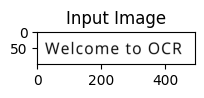

PyTesseract Extracted: Welcome to OCR



In [6]:
img = cv2.imread('OCR Samples/OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

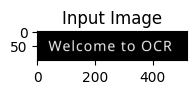

PyTesseract Extracted: Welcome to OCR



In [8]:
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

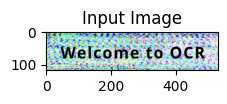

PyTesseract Extracted:  



In [7]:
img = cv2.imread('OCR Samples/OCR3.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

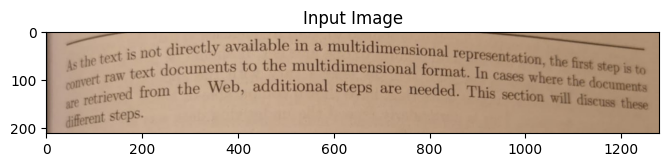

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [9]:
img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

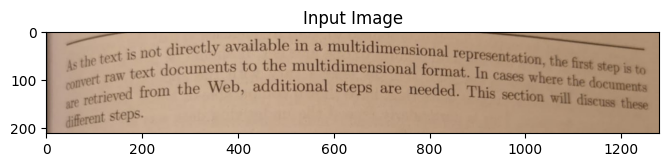

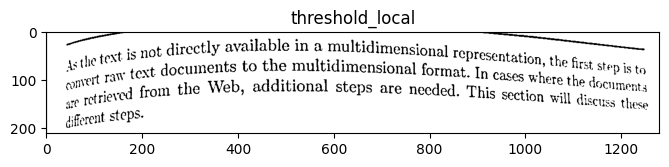

PyTesseract Extracted: j a j multidimensional r
irectly available in a 4
ne text is not direct nts to the multidimensional form,
Ath aw text fo Web, additional steps are necde
‘onl

Cpresentation, the first step is to
at. In cases where the documents

d. This section will discuss these
convert r

are ret rieved fr
diferent StePS-



In [10]:
from skimage.filters import threshold_local

image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))